In [149]:
import sys
sys.path.append('../')
%load_ext autoreload
%autoreload 2
import pandas as pd
import pickle as pkl
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
from notebook_utils import *
from parameter_estimation import load_data_util
import numpy as np
import pandas as pd
import snap
import operator
from sklearn import metrics
# import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='serif', size='15') # controls default text sizes
plt.rc('xtick', labelsize='15')
plt.rc('ytick', labelsize='15')
plt.rc('legend', fontsize='15') # legend fontsize
plt.rc('axes', labelsize='15', titlesize='15')  # fontsize of the x and y labels # fontsize of the axes title
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
fake_component = 1
output = "all_kwon/kwon_testC"
data = "kwon"
output_dir = "../output/{}/".format(output)
edge_file = output_dir + 'learned_graph.tsv'
idx2u_file = output_dir + 'idx2u.txt'
resp_file = output_dir + 'resp.txt'
selected_infl_file = output_dir + 'selected_influential_users.tsv'
data_dir = "../data/{}/".format(data)
cascades_file = data_dir + 'cascades.txt'
casnames = np.loadtxt(data_dir + 'cascade_names.txt', dtype=str)
labels_file = data_dir + 'labels.txt'
links = data_dir + 'rel_links.txt'

df = pd.read_csv(edge_file, sep='\t')
idx2u = np.loadtxt(idx2u_file)
print('considered users in inference', len(idx2u))
train_cascades = read_cascades_file(cascades_file)
train_labels = np.loadtxt(labels_file)
print('num cascades', len(train_cascades), len(train_labels))
# inf_df = pd.read_csv(selected_infl_file, sep='\t', header=0)
# print('num selected infl', len(inf_df))
resp = np.loadtxt(resp_file)

considered users in inference 2930
num cascades 111 111


In [54]:
follower_df = pd.read_csv(links, header=None, sep=' ') 
follower_df.head()

,0,1
0,287228,132630
1,287228,132630
2,8213456,132630
3,8213456,132630
4,9019791,132630


In [55]:
resp[0:10]

array([[8.72417458e-17, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.64058966e-91, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.23198823e-13, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.62955017e-28, 1.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [3.24744230e-48, 1.00000000e+00, 1.00000000e+00, 5.00000000e+00],
       [1.00000000e+00, 1.82046128e-60, 1.00000000e+00, 6.00000000e+00],
       [4.63528169e-01, 5.36471831e-01, 1.00000000e+00, 7.00000000e+00],
       [7.27986639e-01, 2.72013361e-01, 0.00000000e+00, 8.00000000e+00],
       [5.32379524e-36, 1.00000000e+00, 0.00000000e+00, 9.00000000e+00],
       [4.00373200e-01, 5.99626800e-01, 1.00000000e+00, 1.00000000e+01]])

In [57]:
prob_fake = resp[:, fake_component]
y_pred = prob_fake > 0.5
y_fake = resp[:, 2]
casind = resp[:, 3]

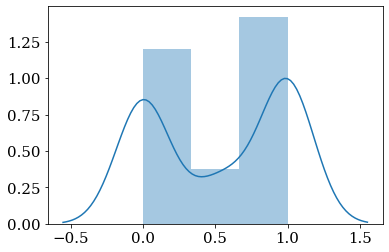

In [58]:
sns.distplot(prob_fake)

In [151]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_fake, prob_fake>0.5).ravel()
tot = tn + fp + fn + tp
tn, fp, fn, tp

(25, 24, 14, 32)

In [60]:
print('acc = {}%'.format(100 - (fp + fn)*100/tot))

acc = 60.0%


In [61]:
tp / tot

0.3368421052631579

In [62]:
tn / tot

0.2631578947368421

In [63]:
(prob_fake > 0.8).sum()/tot

0.45263157894736844

In [64]:
(prob_fake < 0.2).sum()/tot

0.3894736842105263

In [65]:
((prob_fake >= 0.2) & (prob_fake <= 0.8)).sum()/tot

0.15789473684210525

(1, 1) tp
[0, 1, 5, 7, 10, 11, 18, 26, 32, 34, 37, 41, 43, 44, 45, 46, 60, 61, 65, 66, 71, 73, 75, 83, 84, 86, 90, 93, 100, 101, 102, 109]
['R_EricssonFreeLaptop.txt' 'R_ZunePhone.txt' 'R_Bigfoot.txt'
 'R_NotCallRegi.txt' 'R_Duckquack.txt' 'R_ListerineMosquito.txt'
 'R_DennisKucinichUFO.txt' 'R_GoogleSkype.txt' 'R_PepsiAIDS.txt'
 'R_Jamie.txt' 'R_Earwig.txt' 'R_Dork.txt' 'R_KayneWestKingOfPOP.txt'
 'R_IphoneNano.txt' 'R_LadyGaga.txt' 'R_breastInfestation.txt'
 'R_barneyCocain.txt' 'R_GiantCatfish.txt' 'R_harrisonFord.txt'
 'R_ObamaOnePercent.txt' 'R_jeffGoldblum.txt' 'R_SarahPalin.txt'
 'R_swineZombie.txt' 'R_Ipod64.txt' 'R_ManEatingGoonch.txt'
 'R_SwinePork.txt' 'R_emmaWatson.txt' 'R_obamaNaturalBorn.txt'
 'R_McCainManchurian.txt' 'R_AsparagusCancer.txt' 'R_Xbox720.txt'
 'R_MileyCyrus.txt']
R_obamaNaturalBorn.txt


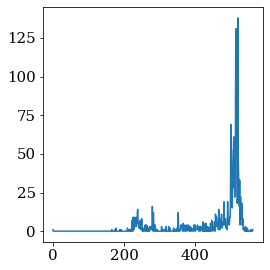

R_McCainManchurian.txt


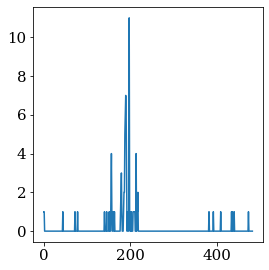

R_AsparagusCancer.txt


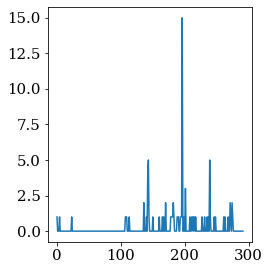

R_Xbox720.txt


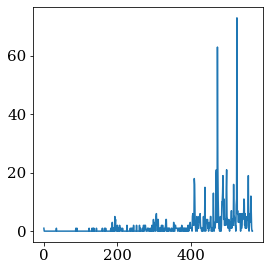

R_MileyCyrus.txt


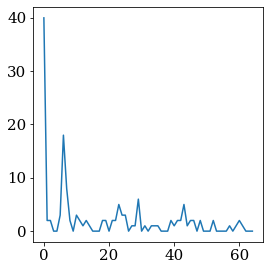

(0, 0) tn
[8, 12, 13, 14, 19, 21, 28, 33, 35, 40, 53, 54, 55, 58, 64, 76, 80, 81, 88, 89, 95, 96, 97, 98, 99]
['N_Vince.txt' 'N_Sicko.txt' 'N_ClarkRockefeller.txt'
 'N_ElephantPaint.txt' 'N_HamsterOnAPiano.txt' 'N_ByrdBillings.txt'
 'N_JenniferHudson.txt' 'N_SarahJessicaSurrogate.txt' 'N_Georgetiller.txt'
 'N_Peanutrecall.txt' 'N_JayceeDugard.txt' 'N_ObamaFly.txt'
 'N_josefFritzl.txt' 'N_pregnantMan.txt' 'N_Cristiano.txt'
 'N_PlaxicoBurress.txt' 'N_Turkishcrash.txt' 'N_PspGo.txt'
 'N_Englandback.txt' 'N_twittersummize.txt' 'N_palmPre.txt'
 'N_EmmaWatsonMagazine.txt' 'N_SquareWatermelon.txt'
 'N_CharlieWilsonWar.txt' 'N_Airfrance.txt']
N_palmPre.txt


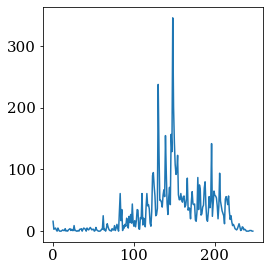

N_EmmaWatsonMagazine.txt


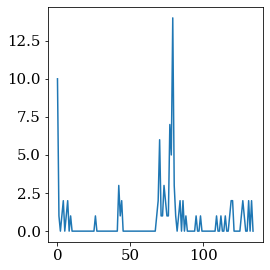

N_SquareWatermelon.txt


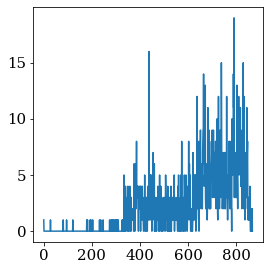

N_CharlieWilsonWar.txt


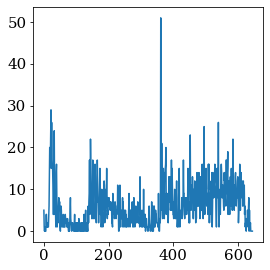

N_Airfrance.txt


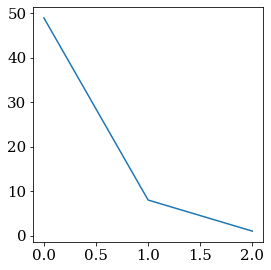

(1, 0) fp
[2, 3, 9, 24, 29, 31, 39, 42, 48, 49, 50, 52, 59, 62, 70, 77, 82, 85, 87, 94, 104, 107, 108, 110]
['N_Havard.txt' 'N_Toughbook30.txt' 'N_breastMilkIceCream.txt'
 'N_ObamaFishing.txt' 'N_heathLedger.txt' 'N_IranProtestVideo.txt'
 'N_AnnieLe.txt' 'N_Dell.txt' 'N_WesternSpaghetti.txt' 'N_District.txt'
 'N_eee1101ha.txt' 'N_Amanda.txt' 'N_Ivancamerondied.txt' 'N_Airliner.txt'
 'N_NikonD300s.txt' 'N_Jhonbrain.txt' 'N_OJSimpson.txt'
 'N_BarnesNobleObamaMonkey.txt' 'N_surrogateMom.txt' 'N_Vanessa.txt'
 'N_PrinceChunkCat.txt' 'N_ChristianTheLion.txt' 'N_BeefProtest.txt'
 'N_westNile.txt']
N_Vanessa.txt


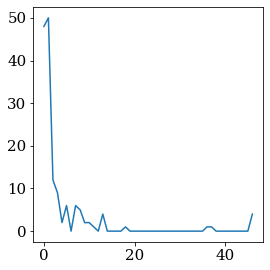

N_PrinceChunkCat.txt


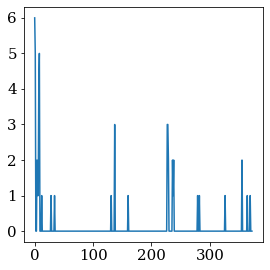

N_ChristianTheLion.txt


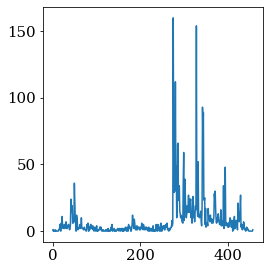

N_BeefProtest.txt


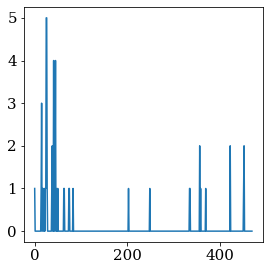

N_westNile.txt


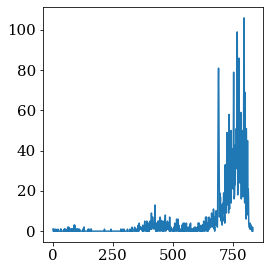

(0, 1) fn
[6, 16, 17, 22, 23, 27, 38, 56, 63, 72, 74, 91, 105, 106]
['R_HIVKetchup.txt' 'R_ReversePIN.txt' 'R_KoreanFanDeath.txt'
 'R_IphoneOLED.txt' 'R_ToothFairy.txt' 'R_Chupacabra.txt'
 'R_alligator.txt' 'R_steorn.txt' 'R_onionIpod.txt'
 'R_DeodorantCancer.txt' 'R_Montauk.txt' 'R_MidgetPC.txt'
 'R_obamaanti.txt' 'R_HallmarkPostcardVirus.txt']
R_DeodorantCancer.txt


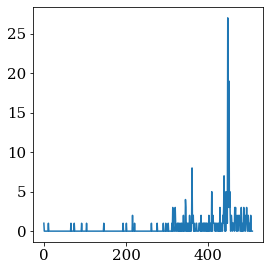

R_Montauk.txt


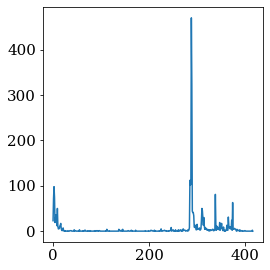

R_MidgetPC.txt


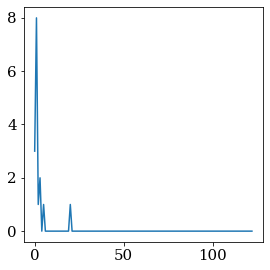

R_obamaanti.txt


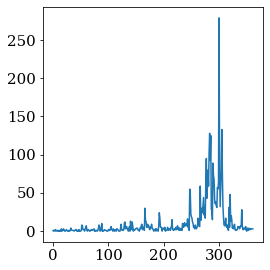

R_HallmarkPostcardVirus.txt


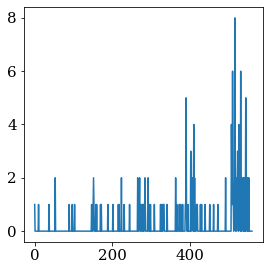

In [152]:
comb = [(1,1), (0,0), (1,0), (0, 1)]  # y_pred, y_fake
comb_name = ['tp', 'tn', 'fp', 'fn']
# tp, tn, fp, fn
for c, n in zip(comb, comb_name):
    print(c, n)
    cind = np.array(casind[(y_pred == c[0]) & (y_fake == c[1])], dtype=np.int32)
    cname = casnames[cind]
    print(list(cind))
    print(cname)
    for cno in cind[-5:]:
        plotting_timeseries(cno)


[7, 10, 11, 32, 34, 37, 38, 46, 83, 84, 85, 109]
R_NotCallRegi.txt


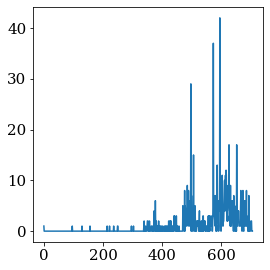

R_Duckquack.txt


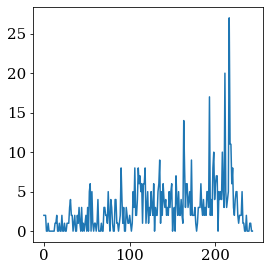

R_ListerineMosquito.txt


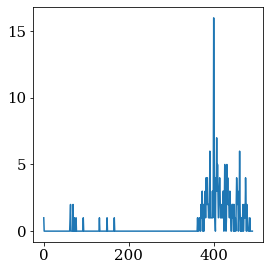

R_PepsiAIDS.txt


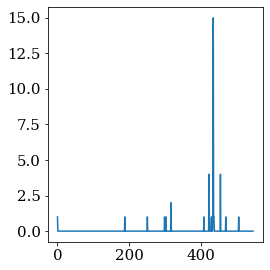

R_Jamie.txt


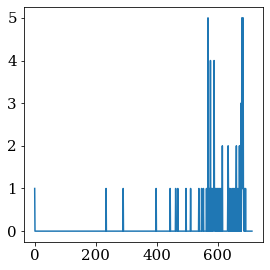

R_Earwig.txt


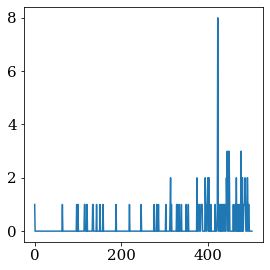

R_alligator.txt


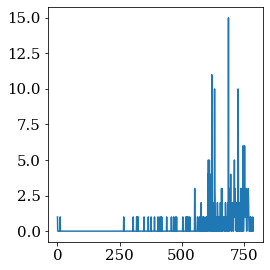

R_breastInfestation.txt


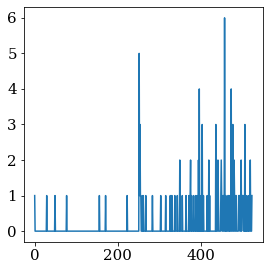

R_Ipod64.txt


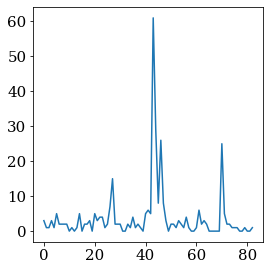

R_ManEatingGoonch.txt


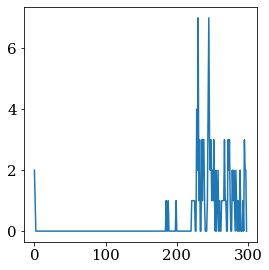

N_BarnesNobleObamaMonkey.txt


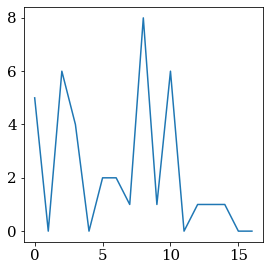

R_MileyCyrus.txt


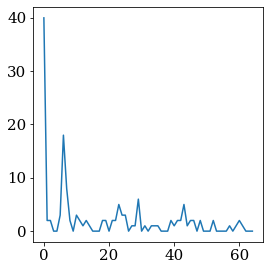

array(['R_NotCallRegi.txt', 'R_Duckquack.txt', 'R_ListerineMosquito.txt',
       'R_PepsiAIDS.txt', 'R_Jamie.txt', 'R_Earwig.txt',
       'R_alligator.txt', 'R_breastInfestation.txt', 'R_Ipod64.txt',
       'R_ManEatingGoonch.txt', 'N_BarnesNobleObamaMonkey.txt',
       'R_MileyCyrus.txt'], dtype='<U28')

In [153]:
cind = np.array(casind[(prob_fake >= 0.4) & (prob_fake <= 0.6)], dtype=np.int32)
print(list(cind))
for cno in cind[0:]:
    plotting_timeseries(cno)
casnames[cind]

#### 

In [37]:
cascades_file = "../data/kwon/cascades.txt"
links_file = "../data/kwon/rel_links.txt"
labels_file = "../data/kwon/labels.txt"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
all_cas_users = set()
list_cas = []
f = open(cascades_file, 'r')
for i, line in enumerate(f.readlines()):
    #print(line)
    cas_times = np.array(line.split(',')[1::2], dtype=np.float32)
    cas_users = np.array(line.split(',')[::2], dtype=np.int64)
    list_cas.append((cas_users, cas_times))
    all_cas_users.update(set(cas_users))
#     if i == 3:
#         break
print("done", len(all_cas_users))

import pandas as pd
df = pd.read_csv(links_file, sep=' ', header=None)

print(df.head()) # 0 follows 1
print(len(df))
# source -> tweets -> A comments (A follows source)
# info diffusion from source to A. (p_sA > 0)
# directed edge from s to A.

# A follows S
# Then S->A edge in graph if time(S) < time(A)
# A follows B
# Then B->A edge in graph if time(B) < time(A)
# Between S and B, keep one with later timestep.
#     S A B
# S     1
# A
# B     1
# each col should have at most 1 one. keep latest timestep

# construct retweet graph for each cascade from follow links (time take last one as parent)
import networkx as nx 

def get_graph_cc(links, casu, cast):
    # get times
    time_dict = {} # uid -> time
    for u, t in zip(casu, cast):
        time_dict[u] = t
    
    linked_user_dict_ = {} # uid -> index
    list_linked_user = [] # list of indexed uid
    next_user = 0
    for index, row in links.iterrows():
        u, v = row[0], row[1]
        if u not in linked_user_dict_:
            linked_user_dict_[u] = next_user
            list_linked_user.append(u)
            next_user += 1
        if v not in linked_user_dict_:
            linked_user_dict_[v] = next_user
            list_linked_user.append(v)
            next_user += 1
    set_linked_u = set(linked_user_dict_.keys())
    isolated_u = set(casu) - set_linked_u
    # print("isolated", len(isolated_u), len(casu))
    
    total_linked_users = len(linked_user_dict_)
    mat = np.zeros((total_linked_users, total_linked_users))
    for index, row in links.iterrows():
        u, v = row[0], row[1]
        if time_dict[v] < time_dict[u]:
            mat[linked_user_dict_[v], linked_user_dict_[u]] = 1
    # print(mat)
    
    time_col = np.zeros((total_linked_users))
    for i, user in enumerate(list_linked_user):
        time_col[i] = time_dict[user]    
    
    for colno in range(len(mat)):
        col = mat[:, colno]
        if col.sum() > 1:
            ind = np.argmax(col)
            mat[:, colno] = 0
            mat[ind, colno] = 1
    
    G = nx.from_numpy_matrix(mat, create_using=nx.DiGraph())
    add = len(isolated_u)
    num_nodes = G.number_of_nodes()
    Nextra = np.arange(num_nodes, num_nodes+add)
    G.add_nodes_from(Nextra)
    return G

clist= [ 13,  21,  24,  31,  33,  35,  45,  52,  53,  54,  58,  72,  74,
        75,  76,  81,  82,  86,  93,  98,  99, 105, 110]
# for cno in clist:
#     cas = list_cas[cno]
#     print(casnames[cno])
#     casu, cast = cas[0], cas[1]
#     links = df[df[0].isin(casu) & df[1].isin(casu)]
#     # print(len(casu))
#     G = get_graph_cc(links, casu, cast)
#     # print(G.nodes())
#     # print(G.edges())
#     # print(casu)
#     nx.draw_random(G, node_size=15)
#     plt.show()
    # break
    
# ARE looking at diffusion links amongst most active users only here (meminf paper, all)

done 117824
         0       1
0   287228  132630
1   287228  132630
2  8213456  132630
3  8213456  132630
4  9019791  132630
27752


In [145]:
def plotting_timeseries(cno):
    cas = list_cas[cno]
    print(casnames[cno])
    casu, cast = cas[0], cas[1]
    i_cumulative = []
    cutoff = 1000000
    lag = 24

    i_in_period = 0;
    hour = lag

    for uname, timestamp in zip(casu, cast):
        # print uname, timestamp
        timestamp = float(timestamp)/3600.0
        if timestamp > cutoff and len(i_cumulative) >= 30: 
            print("breaking")
            break
        if timestamp > hour:
            counter = timestamp / lag - len(i_cumulative) 
            # if counter > 100: counter=100
            for c in range(int(counter)):
                i_cumulative.append(i_in_period)
                hour += lag
                i_in_period = 0
            # print "adding", counter
        i_in_period += 1
        # if len(i_cumulative) > 1000: break
    # print(i_cumulative, len(i_cumulative))
    plt.figure(figsize=(4,4))
    plt.plot(np.arange(len(i_cumulative)), i_cumulative) # , label=casnames[cno])
    # plt.xlim(0, 500)
#     plt.xlabel('Time')
#     plt.ylabel('Tweets')
    # plt.legend()
    plt.tight_layout()
    plt.savefig('figs/' + casnames[cno] + '.png')
    # plt.ylim(0, 200)
    plt.show()

R_MileyCyrus.txt


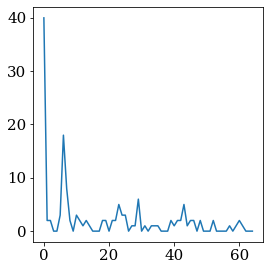

In [146]:
plotting_timeseries(cno)

In [85]:
# tp
casind[(y_pred == 1) & (y_fake == 1)]

array([  0.,   1.,   5.,   7.,  10.,  11.,  18.,  26.,  32.,  34.,  37.,
        41.,  43.,  44.,  45.,  46.,  60.,  61.,  65.,  66.,  71.,  73.,
        75.,  83.,  84.,  86.,  90.,  93., 100., 101., 102., 109.])

In [76]:
# tn
casind[(y_pred == 0) & (y_fake == 0)]

array([ 8., 12., 13., 14., 19., 21., 28., 33., 35., 40., 53., 54., 55.,
       58., 64., 76., 80., 81., 88., 89., 95., 96., 97., 98., 99.])

In [77]:
# fp
casind[(y_pred == 1) & (y_fake == 0)]

array([  2.,   3.,   9.,  24.,  29.,  31.,  39.,  42.,  48.,  49.,  50.,
        52.,  59.,  62.,  70.,  77.,  82.,  85.,  87.,  94., 104., 107.,
       108., 110.])

In [78]:
# fn
casind[(y_pred == 0) & (y_fake == 1)]

array([  6.,  16.,  17.,  22.,  23.,  27.,  38.,  56.,  63.,  72.,  74.,
        91., 105., 106.])